In [3]:
%env CUDA_VISIBLE_DEVICES=1

env: CUDA_VISIBLE_DEVICES=1


In [2]:
from medvqa.train_vqa import debug_main
import shlex

In [3]:
output = debug_main(args=shlex.split(
    ' '.join([        
        '--epochs 1',
        '--batches-per-epoch 20',
        '--batch-size 80',
        '--iters-to-accumulate 1',
        '--num-workers 3',
        '--optimizer-name "adamw"',
        '--scheduler "warmup+decay"',
        '--lr 1e-6',
        '--warmup-and-decay-args "1e-6,4,4e-4,76,5e-6"',
        '--use-padchest',
        '--padchest-use-validation',
        '--padchest-weight 1',
        '--padchest-train-study-ids-path "/home/pamessina/medvqa-workspace/cache/padchest/train_study_ids_20221213_201435.txt"',
        '--padchest-val-study-ids-path "/home/pamessina/medvqa-workspace/cache/padchest/val_study_ids_20221213_201435.txt"',
        '--padchest-test-study-ids-path "/home/pamessina/medvqa-workspace/cache/padchest/test_study_ids_20221213_201435.txt"',
        '--classify-orientation',
        '--raw-image-encoding "densenet-121"',
        '--question-encoding "one-hot"',
        '--answer-decoding "transformer"',
        '--binary-loss-name "wbce-c"',
        '--use-amp',
        '--no-save',
    ])
))

script's arguments:
   epochs: 1
   batches_per_epoch: 20
   checkpoint_folder: None
   iuxray_qa_adapted_reports_filename: None
   mimiccxr_qa_adapted_reports_filename: None
   vocab_min_freq: 10
   embed_size: 256
   question_encoding: one-hot
   answer_decoding: transformer
   question_hidden_size: 128
   answer_hidden_size: 256
   visual_input_mode: raw-image
   raw_image_encoding: densenet-121
   image_local_feat_size: 1024
   image_encoder_pretrained_weights_path: None
   freeze_image_encoder: False
   imagenet_pretrained: False
   visual_features_mlp_in_dim: None
   visual_features_mlp_out_dim: None
   visual_features_mlp_hidden_dims: None
   iuxray_precomputed_visual_features_path: None
   mimiccxr_precomputed_visual_features_path: None
   chexpert_precomputed_visual_features_path: None
   vinbig_precomputed_visual_features_path: None
   clip_version: None
   n_lstm_layers: 1
   transf_dec_nhead: 2
   transf_dec_dim_forward: 256
   transf_dec_num_layers: 2
   question_vec_size:

/home/pamessina/MedVQA/medvqa/train_vqa.py:625: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  **padchest_dataset_kwargs,


Number of rows before filtering: 160861
Number of rows after filtering: 109821
Number of labels: 193
Number of localizations: 104
Generating answers based on labels...


100%|██████████████████████████████████████████████████████████████████████████████████| 109821/109821 [00:01<00:00, 72244.01it/s]


Done. Example answer: <s> normal </s>
Generating answers based on localizations...


100%|██████████████████████████████████████████████████████████████████████████████████| 109821/109821 [00:01<00:00, 67801.21it/s]


Done. Example answer: <s> loc perihilar , loc pleural , loc hemithorax , loc dorsal vertebrae , loc cardiac , loc left </s>
Number of non-empty answers: 36165
Generating answers based on labels localizations by sentence...


100%|██████████████████████████████████████████████████████████████████████████████████| 109821/109821 [00:02<00:00, 40521.48it/s]


Done. Example answer: <s> pleural effusion loc bilateral loc left loc pleural unchanged </s>
len(self.train_dataset) = 1000000000000000000
len(self.val_dataset) = 4393


Idx: 70220
Image path: /mnt/workspace/PadChest/images-small/216840111366964013451228379692012282123637579_01-116-189.png


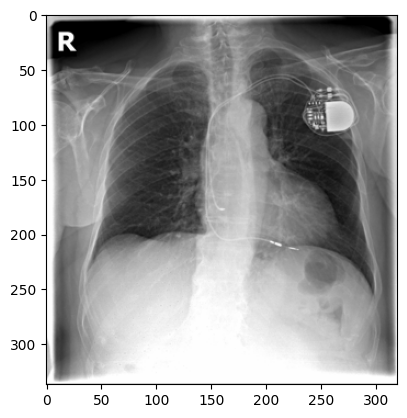

Projection: PA
Gender: F
Question: **(#193) Labels question
Answer: <s> vertebral degenerative changes , dual chamber device , pacemaker , cardiomegaly , aortic elongation , supra aortic elongation , calcified granuloma </s>
Labels: aortic elongation, calcified granuloma, cardiomegaly, dual chamber device, pacemaker, supra aortic elongation, vertebral degenerative changes
Localizations: loc aortic, loc cardiac, loc lingula, loc supra aortic


In [11]:
output['padchest_vqa_trainer'].print_dataset_instance(output['padchest_vqa_trainer'].train_dataset, 100)

In [8]:
!python ../train_vqa.py \
        --epochs 60 \
        --batches-per-epoch 201 \
        --batch-size 80 \
        --iters-to-accumulate 3 \
        --num-workers 5 \
        --optimizer-name "adamw" \
        --scheduler "warmup+decay" \
        --lr 1e-6 \
        --warmup-and-decay-args "1e-6,4,4e-4,76,5e-6" \
        --use-padchest \
        --padchest-use-validation \
        --padchest-weight 1 \
        --padchest-train-study-ids-path "/home/pamessina/medvqa-workspace/cache/padchest/train_study_ids_20221213_201435.txt" \
        --padchest-val-study-ids-path "/home/pamessina/medvqa-workspace/cache/padchest/val_study_ids_20221213_201435.txt" \
        --padchest-test-study-ids-path "/home/pamessina/medvqa-workspace/cache/padchest/test_study_ids_20221213_201435.txt" \
        --classify-orientation \
        --raw-image-encoding "densenet-121" \
        --question-encoding "one-hot" \
        --answer-decoding "transformer" \
        --binary-loss-name "wbce-c" \
        --use-amp \
        --save

script's arguments:
   epochs: 60
   batches_per_epoch: 201
   checkpoint_folder: None
   iuxray_qa_adapted_reports_filename: None
   mimiccxr_qa_adapted_reports_filename: None
   vocab_min_freq: 10
   embed_size: 256
   question_encoding: one-hot
   answer_decoding: transformer
   question_hidden_size: 128
   answer_hidden_size: 256
   visual_input_mode: raw-image
   raw_image_encoding: densenet-121
   image_local_feat_size: 1024
   image_encoder_pretrained_weights_path: None
   freeze_image_encoder: False
   imagenet_pretrained: False
   visual_features_mlp_in_dim: None
   visual_features_mlp_out_dim: None
   visual_features_mlp_hidden_dims: None
   iuxray_precomputed_visual_features_path: None
   mimiccxr_precomputed_visual_features_path: None
   chexpert_precomputed_visual_features_path: None
   vinbig_precomputed_visual_features_path: None
   clip_version: None
   n_lstm_layers: 1
   transf_dec_nhead: 2
   transf_dec_dim_forward: 256
   transf_dec_num_layers: 2
   question_vec_siz

loss 14.01358, a_loss 8.39370, ema 0.00000, oracc 0.08831, orien_loss 2.13867, gacc 0.54745, gloss 0.70062, b1 0.00195, b2 0.00000, b3 0.00000, b4 0.00000, padchxlmacf1 0.01541, padchxlmicf1 0.01148, padchxlzmacf1 0.02454, padchxlzmicf1 0.01990, padchxl_loss 1.03873, padchxlz_loss 1.11068, 219.24 secs
(2) Validation stage ...
ema 0.00000, oracc 0.16936, gacc 0.55543, b1 0.00143, b2 0.00000, b3 0.00000, b4 0.00000, padchxlmacf1 0.02031, padchxlmicf1 0.01669, padchxlzmacf1 0.03083, padchxlzmicf1 0.02453, 62.06 secs
Adjusting learning rate of group 0 to 4.4721e-06.
---- Epoch 2/60
(1) Training stage (lr = 0.000004) ...
loss 12.87557, a_loss 7.94233, ema 0.02139, oracc 0.70628, orien_loss 0.89279, gacc 0.58284, gloss 0.67836, b1 0.00271, b2 0.00000, b3 0.00000, b4 0.00000, padchxlmacf1 0.01536, padchxlmicf1 0.01124, padchxlzmacf1 0.02715, padchxlzmicf1 0.01925, padchxl_loss 0.87899, padchxlz_loss 0.95522, 303.30 secs
(2) Validation stage ...
ema 0.05372, oracc 0.86661, gacc 0.61621, b1 0.0

In [10]:
!python ../train_vqa.py \
        --checkpoint-folder "models/vqa/20221220_182440_padchest(vqa)_oevqa(dense121+onehot+transf)_visenc-pretr=0_orien_amp" \
        --epochs 57 \
        --batches-per-epoch 201 \
        --batch-size 80 \
        --iters-to-accumulate 3 \
        --num-workers 4 \
        --save

script's arguments:
   epochs: 57
   batches_per_epoch: 201
   checkpoint_folder: models/vqa/20221220_182440_padchest(vqa)_oevqa(dense121+onehot+transf)_visenc-pretr=0_orien_amp
   iuxray_qa_adapted_reports_filename: None
   mimiccxr_qa_adapted_reports_filename: None
   vocab_min_freq: 10
   embed_size: 256
   question_encoding: bilstm
   answer_decoding: lstm
   question_hidden_size: 128
   answer_hidden_size: 256
   visual_input_mode: raw-image
   raw_image_encoding: densenet-121
   image_local_feat_size: 1024
   image_encoder_pretrained_weights_path: None
   freeze_image_encoder: False
   imagenet_pretrained: False
   visual_features_mlp_in_dim: None
   visual_features_mlp_out_dim: None
   visual_features_mlp_hidden_dims: None
   iuxray_precomputed_visual_features_path: None
   mimiccxr_precomputed_visual_features_path: None
   chexpert_precomputed_visual_features_path: None
   vinbig_precomputed_visual_features_path: None
   clip_version: None
   n_lstm_layers: 1
   transf_dec_nhea

ema 0.07011, oracc 0.94036, gacc 0.77555, b1 0.00000, b2 0.00000, b3 0.00000, b4 0.00000, padchxlmacf1 0.03540, padchxlmicf1 0.08022, padchxlzmacf1 0.05242, padchxlzmicf1 0.10920, 66.55 secs
Adjusting learning rate of group 0 to 4.0000e-04.
---- Epoch 5/60
(1) Training stage (lr = 0.000400) ...
loss 5.03557, a_loss 3.07465, ema 0.16598, oracc 0.93595, orien_loss 0.21258, gacc 0.80765, gloss 0.40962, b1 0.14200, b2 0.09684, b3 0.06315, b4 0.04367, padchxlmacf1 0.03587, padchxlmicf1 0.07829, padchxlzmacf1 0.04981, padchxlzmicf1 0.08552, padchxl_loss 0.46902, padchxlz_loss 0.60082, 347.80 secs
(2) Validation stage ...
ema 0.34669, oracc 0.94969, gacc 0.82563, b1 0.00064, b2 0.00030, b3 0.00017, b4 0.00011, padchxlmacf1 0.04140, padchxlmicf1 0.07796, padchxlzmacf1 0.05776, padchxlzmicf1 0.09921, 128.28 secs
Adjusting learning rate of group 0 to 3.7759e-04.
---- Epoch 6/60
(1) Training stage (lr = 0.000378) ...
loss 3.43254, a_loss 2.03871, ema 0.32799, oracc 0.94919, orien_loss 0.17289, ga

In [79]:
from PIL import Image
from medvqa.datasets.image_processing import get_image_transform
import torchvision.transforms as T

In [71]:
transform = get_image_transform()

mean = (0.485, 0.456, 0.406), std = (0.229, 0.224, 0.225)
Returning default transform


In [81]:
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
tf_resize = T.Resize((256, 256))
tf_normalize = T.Normalize(mean, std)
tf_totensor = T.ToTensor()

In [76]:
img = Image.open('/mnt/workspace/PadChest/images-small/100014625199913409730274754282179594842_0jycky.png')

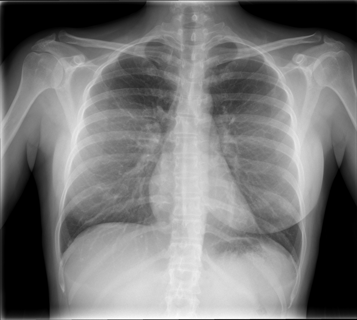

In [114]:
img.point(lambda x: 255 * x / 65535).convert('RGB')

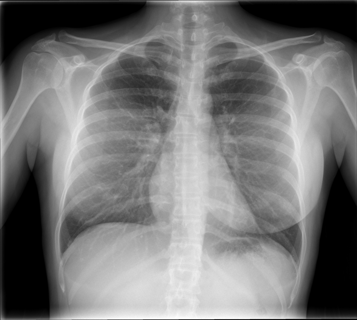

In [111]:
img

In [115]:
aux = tf_totensor(img)

In [116]:
aux.max()

tensor(65535, dtype=torch.int32)

In [117]:
aux2 = tf_totensor(img.point(lambda x: 255 * x / 65535).convert('RGB'))

In [118]:
aux2.shape

torch.Size([3, 320, 357])

In [119]:
x = 0
y = 0
aux[0][x][y], (aux2[0][x][y], aux2[1][x][y], aux2[2][x][y])

(tensor(14470, dtype=torch.int32),
 (tensor(0.2196), tensor(0.2196), tensor(0.2196)))

In [89]:
# print(tf_totensor(tf_resize(img)).shape)
print(tf_totensor(tf_resize(img.convert('RGB'))).shape)

torch.Size([3, 256, 256])


In [78]:
aux = transform(img)

TypeError: Input tensor should be a float tensor. Got torch.int32.

In [37]:
x = "[nan, ['unchanged'], [], ['vascularnan hilar enlargement', 'loc hilar', 'loc cardiac', 'loc mediastinum'], ['normal'], ['normal'], ['normal', 'loc costophrenic angle']]"

In [35]:
import re

In [39]:
re.sub(r'\bnan\b', '[]', x)

"[[], ['unchanged'], [], ['vascularnan hilar enlargement', 'loc hilar', 'loc cardiac', 'loc mediastinum'], ['normal'], ['normal'], ['normal', 'loc costophrenic angle']]"

In [42]:
from medvqa.utils.files import load_pickle

In [162]:
tmp = load_pickle('/home/pamessina/medvqa-workspace/cache/vocab(_mnt_data2_PadChest_PADCHEST_chest_x_ray_images_labels_160K_01.02.19.csv).pkl')

In [53]:
from medvqa.datasets.padchest.padchest_dataset_management import PadChestVocabGenerator

In [134]:
from medvqa.datasets.padchest import PADCHEST_LABELS_CSV_PATH
import pandas as pd
import re
import random

In [129]:
df = pd.read_csv(PADCHEST_LABELS_CSV_PATH)

/home/pamessina/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [136]:
random.choice(df['LabelsLocalizationsBySentence'])

"[['unchanged']]"

In [160]:
tmp_ = random.choice(df['LabelsLocalizationsBySentence'])
print(tmp_)
tmp = tmp_.lower()
tmp = re.sub(r'\bnan\b', '[]', tmp)
tmp = eval(tmp)
print(tmp)
assert type(tmp) is list
if type(tmp[0]) is list:
    sentences = [' '.join(x) for x in tmp]
else:
    sentences = [' '.join(tmp)]
print(sentences)
dedup_sentences = []
for sentence in sentences:
    if sentence not in dedup_sentences:
        dedup_sentences.append(sentence)
print(dedup_sentences)
concat_sentences = ', '.join(dedup_sentences)
print(concat_sentences)
#     sentences = [' '.join(x) for x in labels_localizations_by_sentence]
#     print(sentences)
#     break
#     dedup_sentences = []
#     for sentence in sentences:
#         if sentence not in dedup_sentences:
#             dedup_sentences.append(sentence)
#     concat_sentences = ', '.join(dedup_sentences)    

['sternotomy', 'artificial heart valve', ' metal', 'loc cardiac', 'normal']
['sternotomy', 'artificial heart valve', ' metal', 'loc cardiac', 'normal']
['sternotomy artificial heart valve  metal loc cardiac normal']
['sternotomy artificial heart valve  metal loc cardiac normal']
sternotomy artificial heart valve  metal loc cardiac normal
